In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.cm as cm
from IPython.display import HTML

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams["figure.figsize"] = (14,11)
plt.rcParams["font.size"] = 20

# Julia set

In [3]:
#define julia set equation
def julia_map(c, z):
    return z**2 + c

In [4]:
def plot_map(N, c, z0):
    z = np.zeros(N, dtype=complex)
    z[0] = z0

    for n in range(1,N):
        z[n] = julia_map(c, z[n-1])

    plt.plot(z.real,'.-', label='Re(z)')
    plt.plot(z.imag,'.-', label='Im(z)')
    plt.title(f'Evolution of z for $ z_0 = {z[0]} ,c = {c} $')
    plt.xlabel('n')
    plt.ylabel('value')
    plt.legend()
    plt.show()

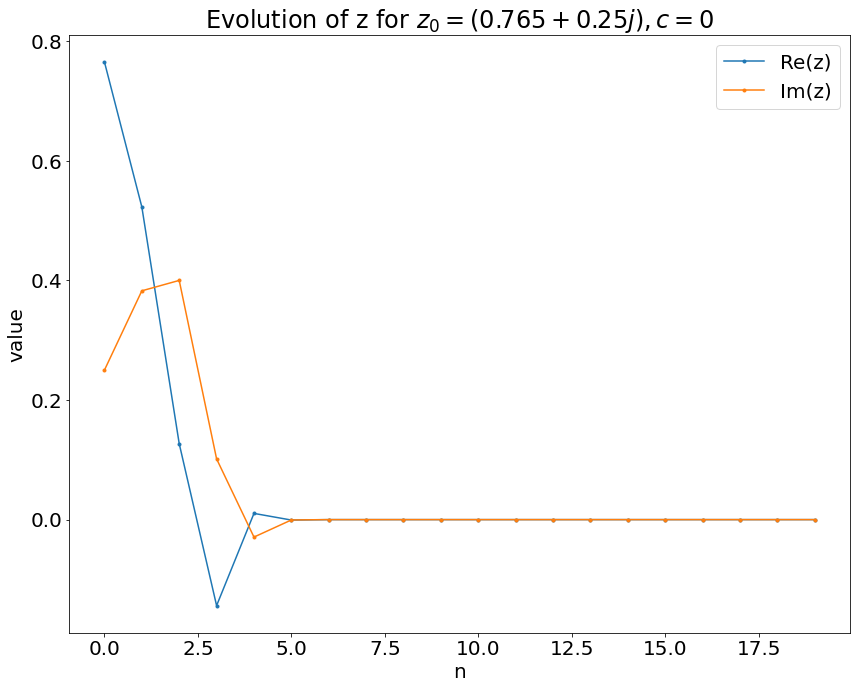

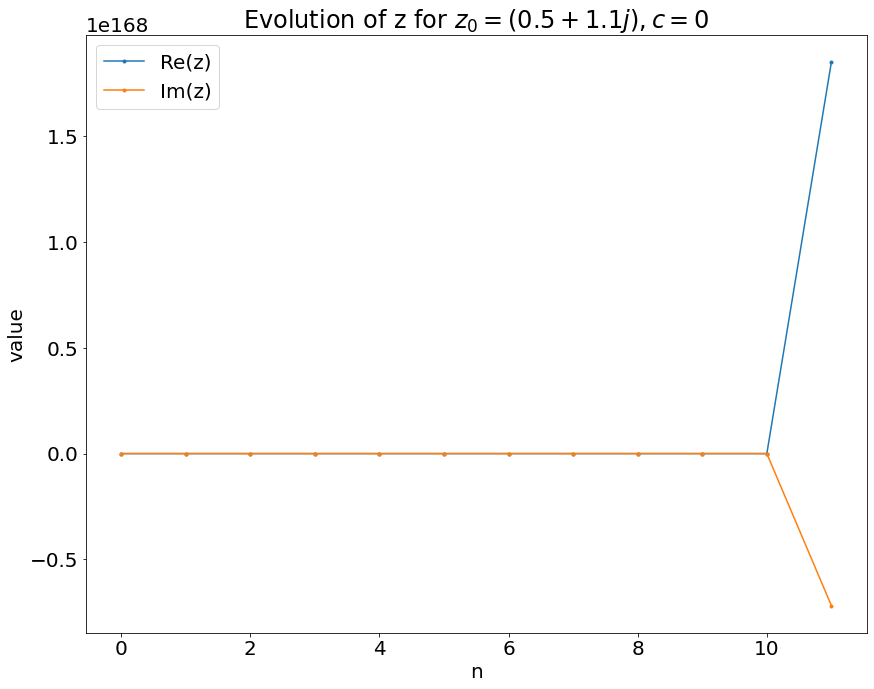

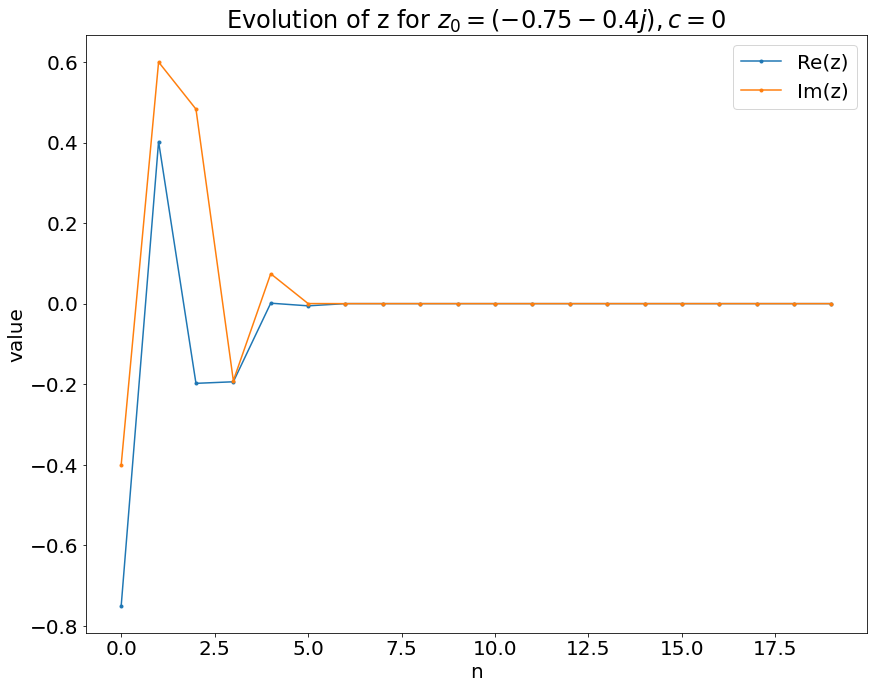

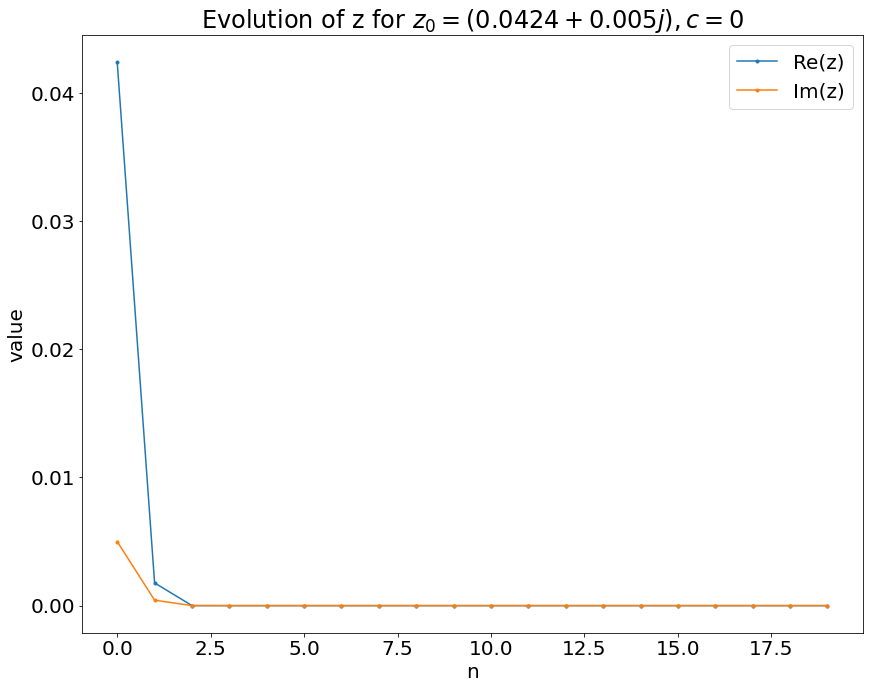

In [5]:
# plot the evolution of z
c = 0
N = 20
z0 = 0.765 + 0.25j

plot_map(N, c, z0)

z0 = 0.5 + 1.1j
plot_map(N, c, z0)

z0 = -0.75 - 0.4j
plot_map(N, c, z0)

z0 = 0.0424 + 0.005j
plot_map(N, c, z0)

In [6]:
def julia_set(c, mesh = 800 , cm = cm.hot ):

    R = 1.5 #escape radius - consider higher as infinity
    Re = np.linspace(-R, R, mesh) #axis ranges from -1.5 to 1.5. 
    Im = np.linspace(-R, R, mesh)
    julia = np.zeros((Re.size, Im.size)) #set of pixels - Argand diagram

    for i in range(Re.size):
        for j in range(Im.size):
            z0 = complex(Re[i], Im[j])  #each point of the diagram is complex number
            
            ite = 0
            max_iter = 100

            while abs(z0) < R and ite < max_iter:    #for each pixel count the number of iterations it takes for the 
                                                    #abs value of the resulting complex number to exceed a certain limit - escape radius
                z0 = z0**2 + c                      #if it hasn’t exceeded this limit after a specific maximum iteration value, we terminate at this maximum.
                ite += 1

            julia[j, i] = ite                         #everything that is higher than escape radius is white
                
    plt.title(f"Julia set for c = {c}")
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.imshow(julia, cmap=cm, extent =(-R, R, -R, R)) #use preset colormap

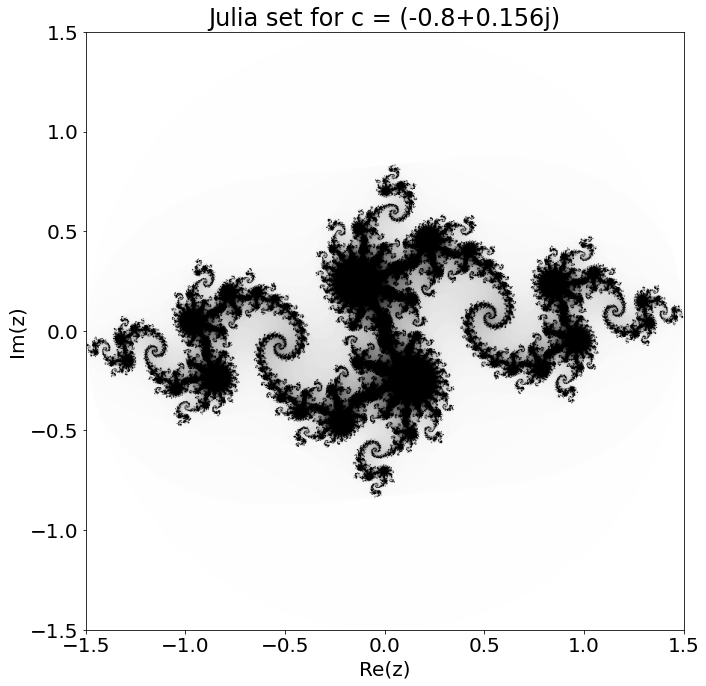

In [7]:
#julia sets for diferent c and maps
#black and white colormap
c = -0.8 + 0.156j
julia_set(c, cm = cm.Greys)


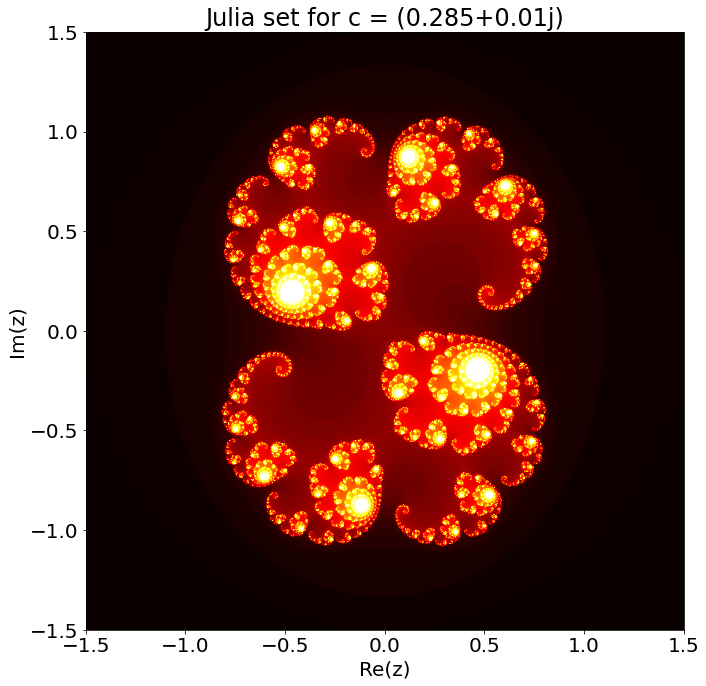

In [8]:
#colored colormap
c = 0.285 + 0.01j
julia_set(c)

Text(0.5, 1.0, 'Julia set for c = 1 - r, where r = 1.618033988749895')

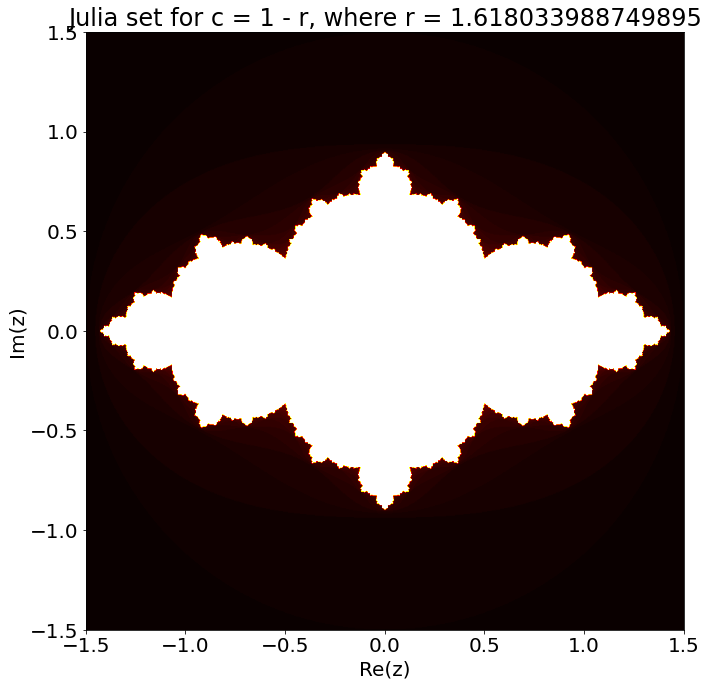

In [9]:
# Julia set c = 1-r, where r is the golden ratio
r = (1 + np.sqrt(5))/2
c = 1 - r
julia_set(c)
plt.title(f"Julia set for c = 1 - r, where r = {r}")

In [12]:
# animate the evolution of Julia set

fig = plt.figure()
ax = plt.axes()

def update(i):
    plt.cla()
    julia_set(np.exp(i*1j),cm = cm.hot_r)
    plt.title(f"Julia set for c = exp(ai), where a = {i:.2f}")

# call the animator	 
anim = FuncAnimation(fig, update, frames=np.linspace(0, 2 * np.pi, 400), interval=20)
####CALCULATES FOR 32 MINUTES
# save the animation as a gif file 
anim.save('julia.gif',writer="pillow") 
plt.close()

HTML('<img src="julia.gif">')